<a href="https://colab.research.google.com/github/RayRay887/AI-Projects/blob/main/Linear_Regression_Project_and_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to Linear Regression
*Notes I created for myself


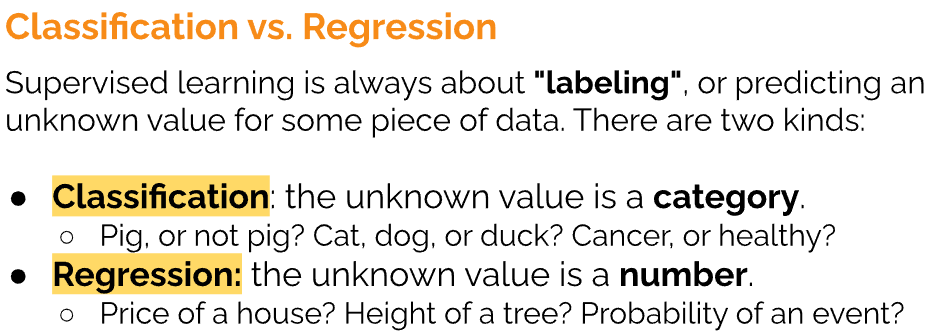

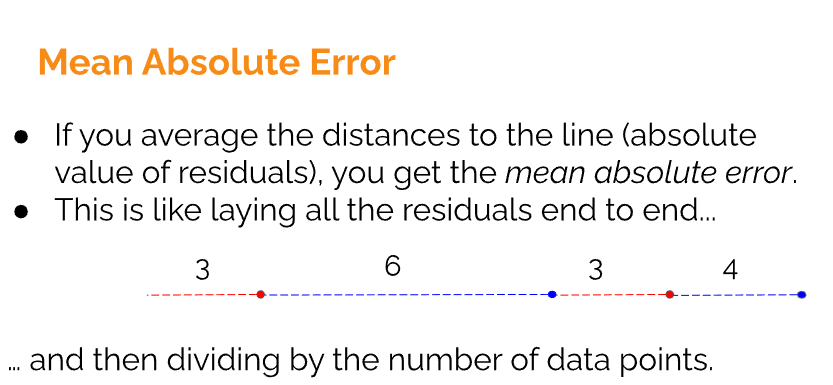

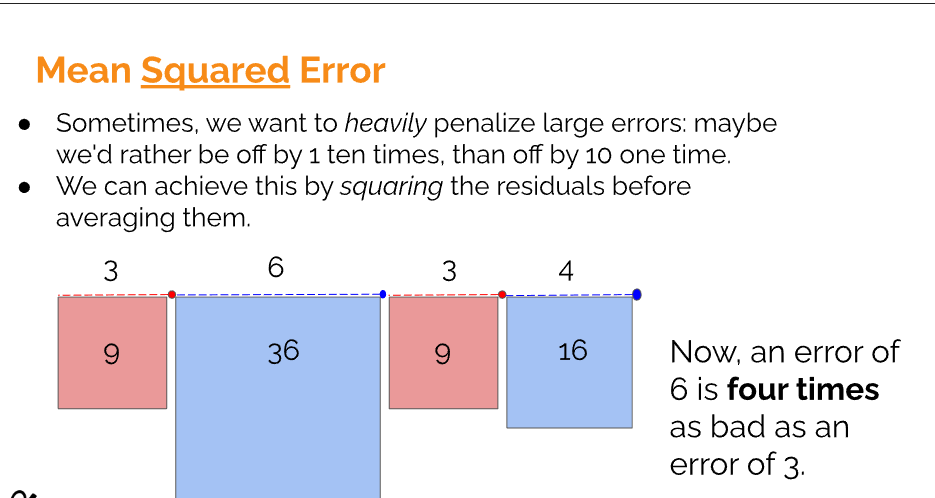

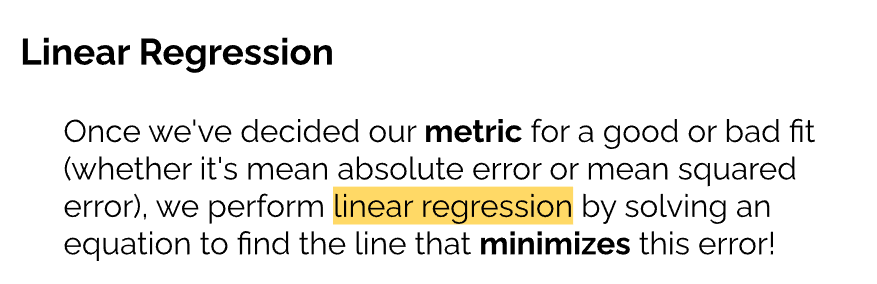

Example: https://setosa.io/ev/ordinary-least-squares-regression/

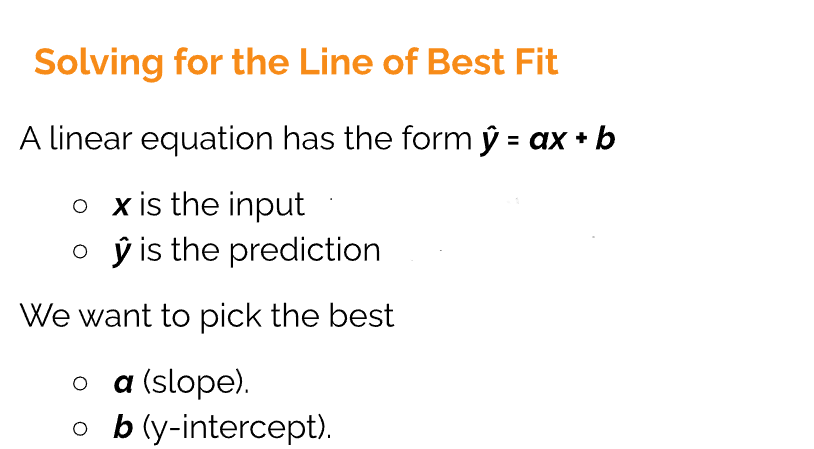

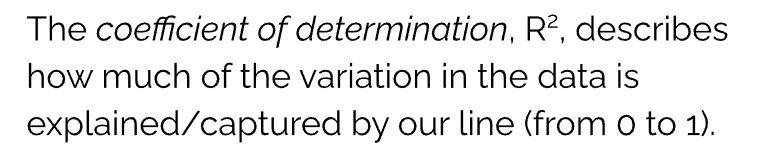

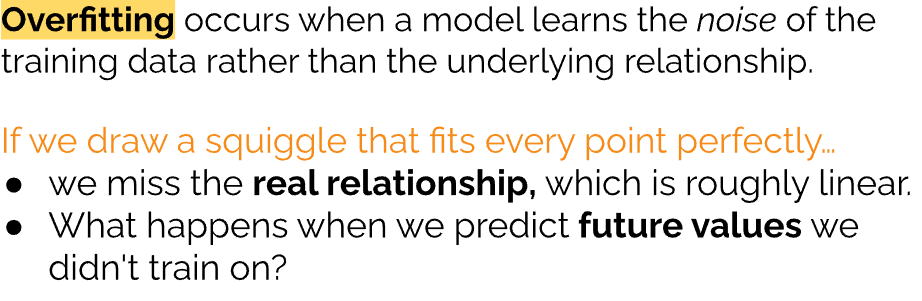

Example:
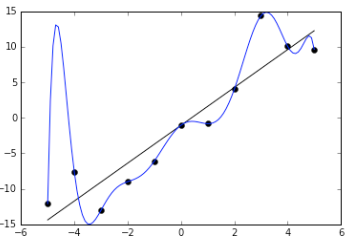

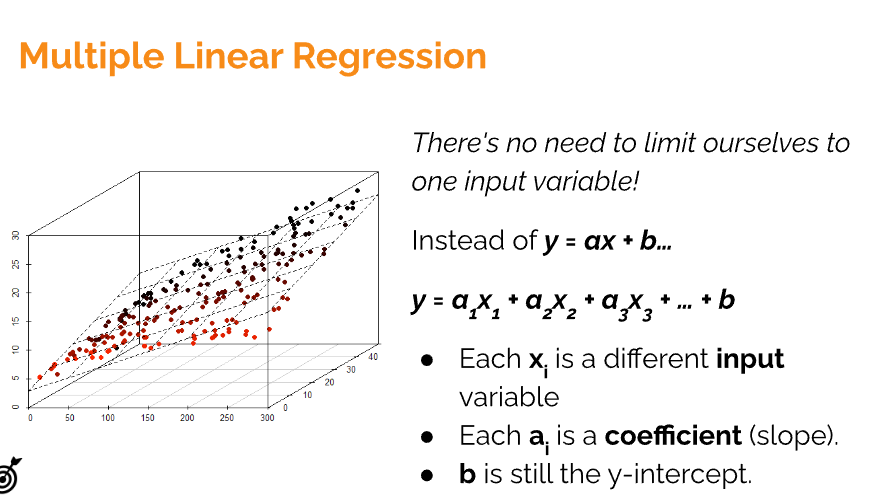

# Introduction to Linear Regression: Buying the Right Car 
This project is really simple and I used the idea of buying the best car to learn and put linear regression models to the test

## Fetching the Data 




Using `Pandas` to load the dataset into this notebook. Using `pandas` to read datafile (`car_dekho.csv`) with the line below. Data will then be assigned and stored under the variable `car_data`.  


In [ ]:
# import libraries { display-mode: "form" }
import pandas as pd   #for tables (google spreadsheets, microsoft excel, csv). 
import os #for navigating your computer's files 

# Dataset is hosted on Google Cloud
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202a%20-%20Linear%20Regression/car_dekho.csv"

# Quiet deprecation warnings
import warnings
warnings.filterwarnings("ignore") 

car_dekho.csv.1     100%[===================>]  13.91K  --.-KB/s    in 0s      


In [ ]:
# read our data in using 'pd.read_csv('file')'
data_path  = 'car_dekho.csv'
car_data = pd.read_csv(data_path)

# What the data looks like

In [ ]:
car_data.head() 

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


units of selling price is in lakhs.**

Here is a visual representation of the dataset above. ![carcharts.png](https://i.postimg.cc/bNyjtBFT/Screen-Shot-2019-06-06-at-8-04-46-PM.png)


### What do the columns in the data table represent?


* `Car_Name`: This column should be filled with the name of the car.

* `Age`: The number of years since the car was made. 

* `Selling_Price`: The price the owner wants to sell the car at.

* `Kms_Driven`: This is the distance completed by the car in km.

* `Fuel_Type`: Fuel type of the car.

* `Seller_Type`: Defines whether the seller is a dealer or an individual.

* `Transmission`: Defines whether the car is manual or automatic.



In [4]:
car_data[['Fuel_Type']].head()
car_data[['Car_Name']].head()

#Length
print(len(car_data))

301


##  Visualizing the Data


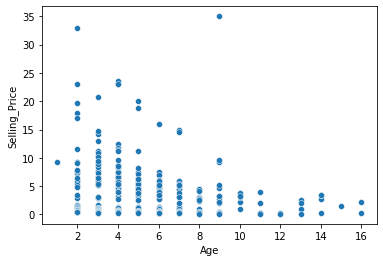

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Each dot is a single example (row) from the dataframe, with its 
# x-value as `Age` and its y-value as `Selling_Price`
sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data)

### Visualizing Categorical Data

`Transmission` can be either be `Manual`or `Automatic`, it is not a number but a categorical variable.



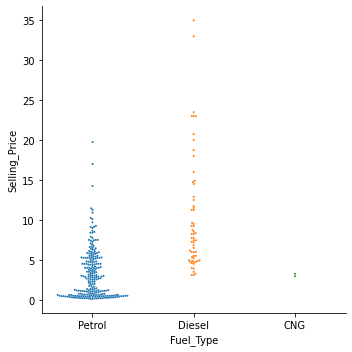

In [6]:
#Use different graph
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)


In [7]:
#  number of `Petrol` vs. `Diesel` vs. `CNG` cars in dataset
car_data.groupby(['Fuel_Type']).count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


Price vs Kms_driven


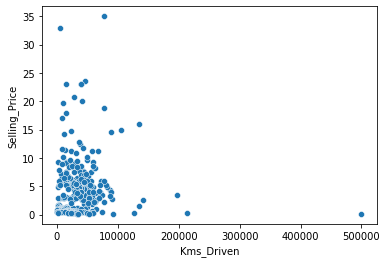

In [8]:
sns.scatterplot(x = 'Kms_Driven', y = 'Selling_Price', data = car_data);

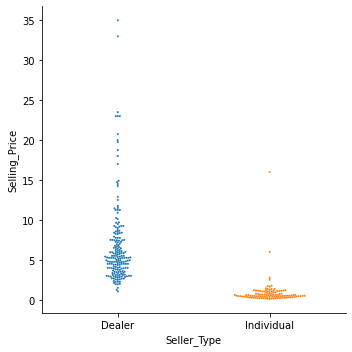

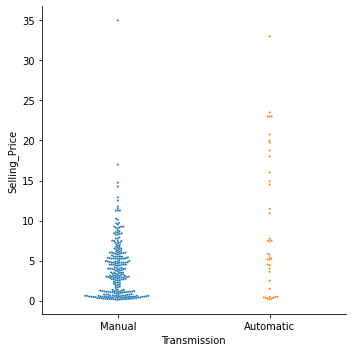

In [9]:
### Testing different variables
sns.catplot(x = 'Seller_Type', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_data, kind = 'swarm', s = 2)

### Linear Regression

Age vs Selling Prices Linear Regression

$y= mx + b$

[![Line of Best Fit](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)


### Linear Regression in Python

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np  

# Initializing X and y variables.
X = car_data[['Age']]
y = car_data[['Selling_Price']]

In [11]:
print(X)
print(y)

     Age
0      5
1      6
2      2
3      8
4      5
..   ...
296    3
297    4
298   10
299    2
300    3

[301 rows x 1 columns]
     Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


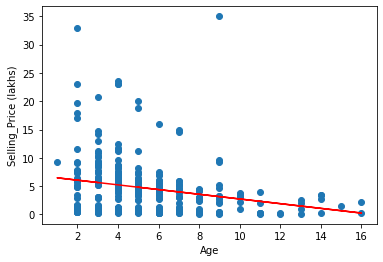

In [12]:
# set up model
linear = LinearRegression()

# train the model 
linear.fit(X, y)

#graph
import matplotlib.pyplot as plt

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price (lakhs)')
plt.show()

In [13]:
#equation
print('Our m in lakhs/year: ', linear.coef_)

Our m in lakhs/year:  [[-0.41509169]]


In [14]:
print('Our intercept b: ', linear.intercept_)

Our intercept b:  [6.89120688]


In [15]:
# example: if somoene offeres 7 lakh for 2016 model
print('Our equation is Price = -0.42 lakhs/year * age + 6.89 lakhs')
print('Therefore, our fair price is %0.2f lakhs'%(-0.42*6.0+6.89))



Our equation is Price = -0.42 lakhs/year * age + 6.89 lakhs
Therefore, our fair price is 4.37 lakhs


##Trying Different Inputs






In [16]:
#transform `Transmission` to a numeric variable by replacing `Manual` with `1` and `Automatic` with `0`.
car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})

In [17]:
#after conversion
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,TransmissionNumber
0,ritz,5,3.35,27000,Petrol,Dealer,Manual,1
1,sx4,6,4.75,43000,Diesel,Dealer,Manual,1
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual,1
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual,1
4,swift,5,4.60,42450,Diesel,Dealer,Manual,1


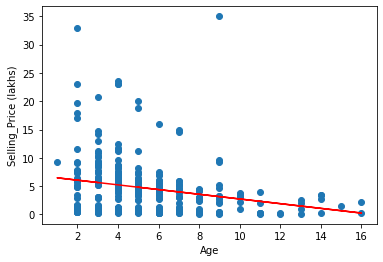

In [18]:
#Initializing our X, y variables

X_column = 'Age' 
X = car_data[[X_column]] 
y = car_data[['Selling_Price']]

#Setting up model
linear = LinearRegression()

#Training
linear.fit(X,y)

#Model
import matplotlib.pyplot as plt

y_pred = linear.predict(X)
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel(X_column) # Automated setup of axis labels
plt.ylabel('Selling_Price (lakhs)')
plt.show()

## Multiple Linear Regression: Using multiple inputs 

Bettering modelby using multiple input variables, like `Kms_Driven` and `Transmission`. 


In [19]:
X = car_data[['Age', 'TransmissionNumber', 'Kms_Driven']]

# set up model
multiple = LinearRegression(fit_intercept = True, normalize = True)

# train the model 
multiple.fit(X, y)


#Comparing R squares values
print('Our single linear model had an R^2 of: %0.3f'%linear.score(car_data[[X_column]], y)) 
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(X, y))

Our single linear model had an R^2 of: 0.056
Our multiple linear model had an R^2 of: 0.203


Including a categorical variable 'Seller_Type'

In [20]:
car_data['SellerNumber'] = car_data['Seller_Type'].replace({'Dealer':1, 'Individual':0})

X = car_data[['Age', 'TransmissionNumber', 'Kms_Driven', 'SellerNumber']].values
print(X.shape)

# set up model
multiple = LinearRegression(fit_intercept = True, normalize = True)

# train the model 
multiple.fit(X, y)

print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(X, y))

(301, 4)
Our multiple linear model had an R^2 of: 0.462


## Finding The Best Deal 

Create a model to be able to determine which cars are overpriced or good deals

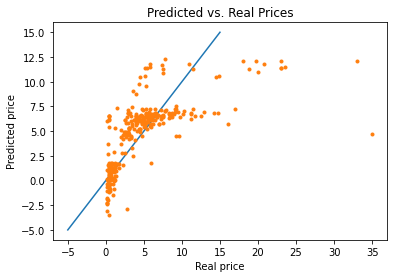

In [21]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
prediction = multiple.predict(X)
plt.plot(y, prediction, '.')
plt.show()

In [22]:
#adding predicted prices to dataframe

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

car_data['Prediction'] = prediction
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    6.032870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    5.713381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    7.177459
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    4.608766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    6.135938
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...
296     city    3           9.50       33988    Diesel      Dealer       Manual                   1             1    6

Figuring out what is a good or bad deals by comparing the real price to the predicted price and add a new column to the data frame. A car with a high Deal Score has a low true cost compared to its predicted value, while a car with a low Deal Score is overpriced. 

In [23]:
car_data['deal_score'] = car_data['Prediction']-car_data['Selling_Price']
print (car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    6.032870    2.682870
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    5.713381    0.963381
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    7.177459   -0.072541
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    4.608766    1.758766
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    6.135938    1.535938
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...         ...
296     city    3           9.50  

identifying the 10 most overpriced cars and the 10 cars that are the best deal.

In [24]:
sorted_data = car_data.sort_values("deal_score")
best_deals = sorted_data.tail(10)
most_overpriced = sorted_data.head(10)
print (best_deals)
print (most_overpriced)

             Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
196         Activa 3g   11           0.17      500000    Petrol  Individual    Automatic                   0             0    6.035551    5.865551
77            corolla   15           1.50      135154    Petrol      Dealer    Automatic                   0             1    7.370486    5.870486
40             baleno    3           5.85       24524    Petrol      Dealer    Automatic                   0             1   11.747177    5.897177
177  Honda Activa 125    3           0.35       24000    Petrol  Individual    Automatic                   0             0    6.269951    5.919951
252              brio    4           5.40       31427    Petrol      Dealer    Automatic                   0             1   11.367002    5.967002
221               i20    6           4.50       32000    Petrol      Dealer    Automatic                   0          

Plot the best deals in one color, the most overpriced cars in another color, and the other cars in a third color.

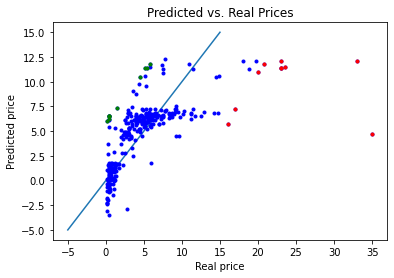

In [25]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.plot(car_data.Selling_Price,car_data.Prediction,'b.')
plt.plot(best_deals.Selling_Price,best_deals.Prediction,'g.')
plt.plot(most_overpriced.Selling_Price,most_overpriced.Prediction,'r.')
plt.show()